# Hepatitis Prediction Project 
- Predict if a patient will live or die based on the parameters using ML

### Workflow
+ Data Prep
+ EDA
+ Feature Selection
+ Build Model
+ Interpret Model
+ Serialization
+ Productionize with Streamlit or Flask

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sweetviz
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import re
import os
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode , iplot , plot
init_notebook_mode(connected = True)
import cufflinks as cf
cf.go_offline()
from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report , confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
# print ('default',os.getcwd())

pd.set_option('display.max_rows', 200)

pd.options.mode.chained_assignment = None

In [3]:
path = 'data/hepatitis.data'
df = pd.read_csv(path)
df.head()

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [4]:
col_names = ["Class",
"AGE",
"SEX",
"STEROID",
"ANTIVIRALS",
"FATIGUE",
"MALAISE",
"ANOREXIA",
"LIVER BIG",
"LIVER FIRM",
"SPLEEN PALPABLE",
"SPIDERS",
"ASCITES",
"VARICES",
"BILIRUBIN",
"ALK PHOSPHATE",
"SGOT",
"ALBUMIN",
"PROTIME",
 "HISTOLOGY"]

In [5]:
df = pd.read_csv(path , names = col_names)
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [6]:
print('Hepatitis Data - rows:' , df.shape[0],'columns:', df.shape[1])

Hepatitis Data - rows: 155 columns: 20


In [7]:
# checking missing values in df
print("There is {} missing values in the dataframe".format(df.isnull().sum().sum()))

There is 0 missing values in the dataframe


In [ ]:
# Tidying up columns 

In [8]:
df.columns = df.columns.str.lower().str.replace(" ","_")

In [9]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [ ]:
# Dealing with placeholders in the data 

In [10]:
df = df.replace("?", 0)

In [11]:
# checking the datatypes of the data
pd.DataFrame([df.dtypes] ,index=['df'] ).T

,df
class,int64
age,int64
sex,int64
steroid,object
antivirals,int64
fatigue,object
malaise,object
anorexia,object
liver_big,object
liver_firm,object


#### Note since the data is all numerical columns , i changed the data types to numerical
+ Also need to take out two columns since they return as float to prevent errors 

In [12]:
# getting columns with object as data type
df.columns[df.dtypes == 'object']

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime'],
      dtype='object')

In [13]:
# there are 15 of these columns
sum(df.dtypes == 'object')

15

# Out of 15 columns ,two columns return as float in the columns 'albumin','bilirubin' hence i removed them.

+ Changing the data type of all these columns

In [14]:
df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot','protime']] = df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot','protime']].astype(int)

In [15]:
df[['bilirubin','albumin']] = df[['bilirubin','albumin']].astype(float)

# Narrative
+ Most of the data were in objects
+ Two were in float

In [16]:
# checking the data types
df.dtypes

class                int64
age                  int64
sex                  int64
steroid              int64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big            int64
liver_firm           int64
spleen_palpable      int64
spiders              int64
ascites              int64
varices              int64
bilirubin          float64
alk_phosphate        int64
sgot                 int64
albumin            float64
protime              int64
histology            int64
dtype: object

In [ ]:
### EDA

+ Descriptive Analysis

In [17]:
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [ ]:
# Value_counts - checking if data is balanced or imbalanced

In [18]:
df['class'].value_counts()

2    123
1     32
Name: class, dtype: int64

In [19]:
target_Label = {'Die':1 , "Live":2}

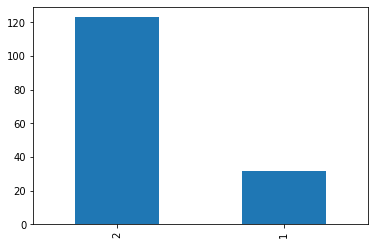

In [20]:
df['class'].value_counts().plot(kind='bar')

In [ ]:
# Observation - data is imbalanced

In [ ]:
# Checking gender of patients

In [21]:
df['sex'].unique()

array([2, 1])

In [38]:
#labels
lab = df["class"].value_counts().keys().tolist()
#values
val = df["class"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Gender distribution in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

In [ ]:
# checking age distiribution

In [22]:
df['age'].min()

7

In [23]:
df['age'].max()

78

In [32]:
labels = ["Below 10","10-20","20-30","30-40","40-50","50-60","60-70","70 and more"]
bins= [0,10,20,30,40,50,60,70,80]
freq_df = df.groupby(pd.cut(df['age'],bins=bins,labels=labels)).size()

In [33]:
freq_df

age
Below 10        1
10-20           3
20-30          29
30-40          50
40-50          35
50-60          24
60-70          11
70 and more     2
dtype: int64

In [34]:
freq_df = freq_df.reset_index(name='count')

In [35]:
freq_df

,age,count
0,Below 10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,70 and more,2


In [ ]:
# Observation :
+ we can see that the highest age group are mostly affected are 30-40years old

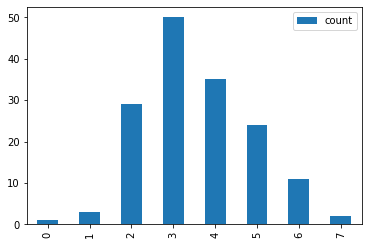

In [30]:
freq_df.plot(kind='bar')

In [ ]:
# Plotting frequency table

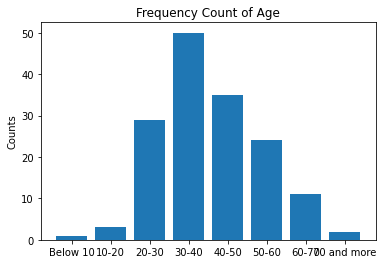

In [36]:
plt.bar(freq_df['age'],freq_df['count'])
plt.ylabel("Counts")
plt.title("Frequency Count of Age")
plt.show()

# Observations :
+ Highest prevalence of Hepatitis is from 30 to 40 years old followed by 50 to 60 years.
+ The least affected age group is under 10 years old.

In [ ]:
# Pie chart 

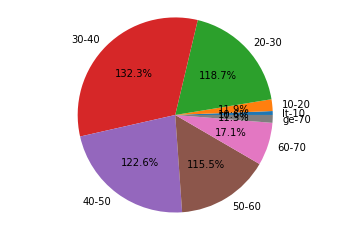

In [37]:
# Pie chart
labels = ['lt-10',"10-20","20-30","30-40","40-50","50-60","60-70","ge-70"]
fig1,ax1 = plt.subplots()
ax1.pie(freq_df['count'],labels=labels,autopct='1%.1f%%')
ax1.axis('equal')
plt.show()

In [ ]:
# Checking outliers